<a href="https://colab.research.google.com/github/neha-binny/Human-Horse/blob/main/MAJ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.preprocessing import image

y_train = []
x_train = []

dir= '/content/drive/MyDrive/Python/Major Project/HUMAN_HORSES/train'
categories = ['humans','horses']
for catg in categories:
  class_num=categories.index(catg)
  path= os.path.join(dir,catg)
  for img in os.listdir(path):
    x = image.load_img(os.path.join(path,img),target_size=(224,224,3))
    img_array = image.img_to_array(x)
    x_train.append(img_array)
    # train_flat_data.append(img_array.flatten())
    y_train.append(class_num)

# train_flat_data = np.array(train_flat_data)
y_train = np.asarray(y_train)
x_train = np.array(x_train)

In [ ]:
y_test = []
x_test = []
#test_flat_data = []

dir= '/content/drive/MyDrive/Python/Major Project/HUMAN_HORSES/validation'
for catg in categories:
  class_num=categories.index(catg)
  path= os.path.join(dir,catg)
  for img in os.listdir(path):
    x = image.load_img(os.path.join(path,img),target_size=(224,224,3))
    img_array = image.img_to_array(x)
    x_test.append(img_array)
    # test_flat_data.append(img_array.flatten())
    y_test.append(class_num)
#test_flat_data = np.array(test_flat_data)
y_test = np.asarray(y_test)
x_test = np.array(x_test)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
from tensorflow import keras
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
model = MobileNetV2(include_top=False)
model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, None, None, 3 0           bn_Conv1[0][0]                   
________________

In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
model =keras.Sequential()
model.add(keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
history = model.fit(x_train,y_train,epochs = 100,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/100
33/33 [==============================] - 4s 31ms/step - loss: 56.8776 - accuracy: 0.4943 - val_loss: 19.2811 - val_accuracy: 0.5312
Epoch 2/100
33/33 [==============================] - 1s 19ms/step - loss: 6.3381 - accuracy: 0.7040 - val_loss: 1.7327 - val_accuracy: 0.7852
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: 0.4666 - accuracy: 0.8437 - val_loss: 0.7868 - val_accuracy: 0.6992
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 0.4914 - accuracy: 0.7492 - val_loss: 0.5285 - val_accuracy: 0.8672
Epoch 5/100
33/33 [==============================] - 1s 19ms/step - loss: 0.2974 - accuracy: 0.8812 - val_loss: 0.5950 - val_accuracy: 0.8164
Epoch 6/100
33/33 [==============================] - 1s 19ms/step - loss: 0.2433 - accuracy: 0.9029 - val_loss: 3.3446 - val_accuracy: 0.5000
Epoch 7/100
33/33 [==============================] - 1s 18ms/step - loss: 1.1501 - accuracy: 0.5622 - val_loss: 0.6608 - val_accuracy: 0.7578
Epoc

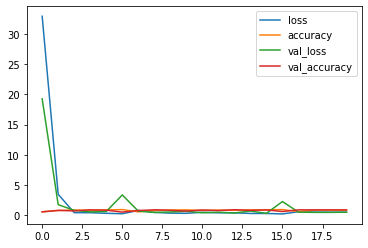

In [ ]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
accuracy_score(y_pred,y_test)*100

86.328125

In [ ]:
confusion_matrix(y_pred,y_test)

array([[128,  35],
       [  0,  93]])

In [ ]:
model.save('horse_human3.hdf5')